In [1]:
dataset_path = "/Users/ramith/Datasets/classification-of-heart-sound-recordings-the-physionet-computing-in-cardiology-challenge-2016-1.0.0"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import os
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import wfdb
from pydub import AudioSegment
import wfdb_custom
from wfdb import processing
import IPython

In [3]:
files = os.listdir(dataset_path + '/training-a/')

In [4]:
wav_files  = sorted([file for file in files if '.wav' in file])

In [15]:
def HS_plot(x,s=0,e=-1,db=20):
    file = wav_files[x]
    spf  = wave.open(dataset_path + '/training-a/' +  file , "r")
    
    meta_data = dataset_path + '/training-a/' + file[:-3] + 'hea'
    
    with open(meta_data) as f:
        content = f.readlines()
    
    print()
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, dtype='int16')

    # If Stereo
    if spf.getnchannels() == 2:
        print("Just mono files")
        sys.exit(0)
    
    x = [0, 1, 2]
    y = [0, 1, 2]

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    plt.figure(figsize=(20,4))
    plt.title("HS Sound - " + file + ' => '+ content[-1])
    x = [i for i in range(s,e)]
    plt.plot(x,signal[s:e],c=color)
    plt.show()

    song = AudioSegment.from_wav(dataset_path + '/training-a/'+ file) + db
    song = song[s/2:e/2]
    
    path = "edited/" + "temp.mp3"
    song.export(path , "mp3")
    
    return IPython.display.Audio(path),song
    


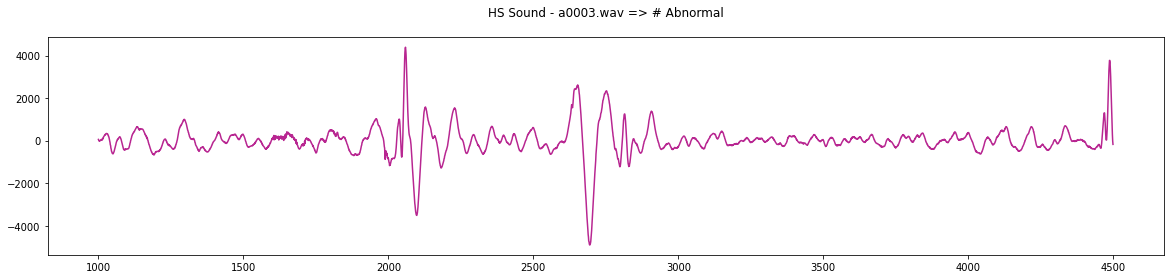

In [25]:
[player,audio] = HS_plot(2,1000,4500)

new = audio.low_pass_filter(20)

path = "edited/" + "temp.mp3"
new.export(path , "mp3")

IPython.display.Audio(path)
    

In [18]:
e


5000


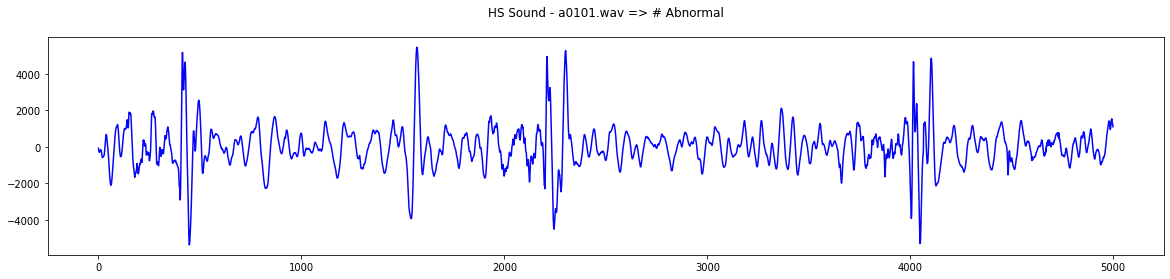

In [7]:
HS_plot(100,0,5000)

In [ ]:
HS_plot(10)

In [ ]:
HS_plot(30)

In [ ]:
HS_plot(295)

In [ ]:
HS_plot(400)

In [ ]:
def plot_pcg_ecg(x,s=0,e=-1):
    rec = wav_files[x][:-4]

    record = wfdb.rdrecord(dataset_path + '/training-a/'+rec) 
    pcg_p = wfdb.processing.find_local_peaks(record.p_signal[:,0],300) 
    ecg_p = wfdb.processing.find_local_peaks(record.p_signal[:,1],300)
    
    #pcg_p = wfdb.processing.find__peaks(record.p_signal[:,0])[0] #0 for hard peaks 
  
    
    peaks = [pcg_p , ecg_p]
    
    wfdb_custom.plot_wfdb(s,e,peaks,record=record, title='Record ' + rec + ' from PhysioNet Challenge 2016' + ' => ' + record.__dict__['comments'][0],figsize=(20,10), time_units = 'samples',ecg_grids=[1]) 
    display(record.__dict__)
    
    





In [14]:
IPython.display.Audio(dataset_path + '/training-a/'+wav_files[1])

In [15]:
wav_files[0]

'a0001.wav'

### plot_pcg_ecg(0,550,500)

In [41]:
def increase_volume(x,db=20):
    song = AudioSegment.from_wav(dataset_path + '/training-a/'+wav_files[0])
    song = song + db
    
    path = "edited/" + wav_files[0]
    song.export("edited/" + wav_files[0] , "wav")

    return IPython.display.Audio(path)

In [44]:
increase_volume(0)


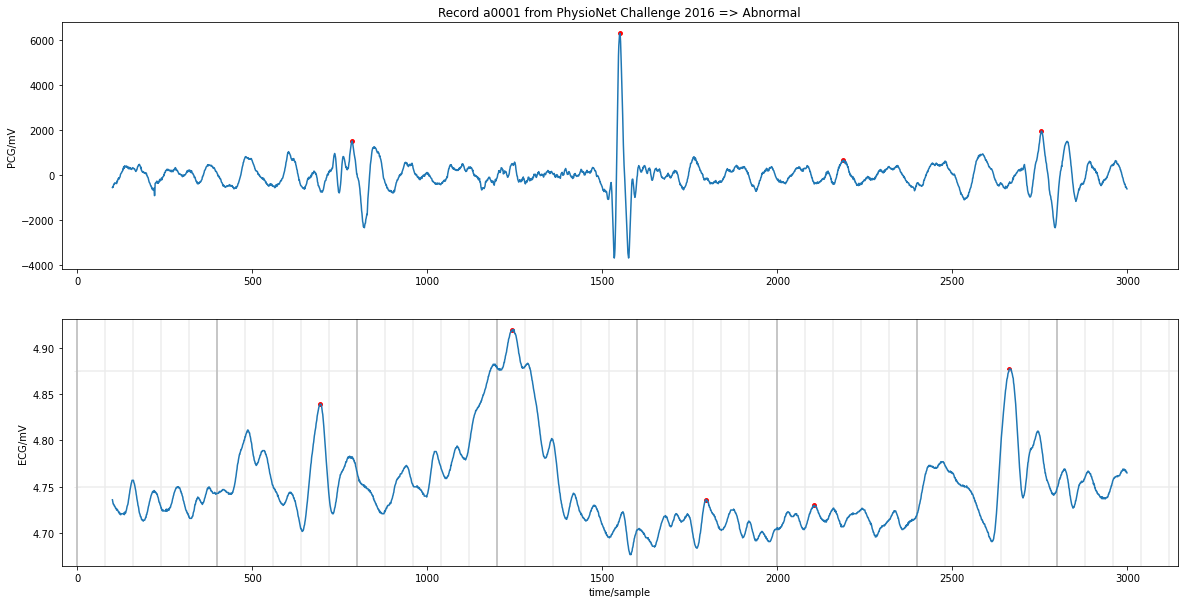

{'record_name': 'a0001',
 'n_sig': 2,
 'fs': 2000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 71332,
 'base_time': None,
 'base_date': None,
 'comments': ['Abnormal'],
 'sig_name': ['PCG', 'ECG'],
 'p_signal': array([[-6.900e+01,  0.000e+00],
        [-1.350e+02,  1.500e-02],
        [-1.040e+02,  4.600e-02],
        ...,
        [-2.850e+02,  4.879e+00],
        [-2.570e+02,  4.877e+00],
        [-1.870e+02,  4.878e+00]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a0001.wav', 'a0001.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [44, None],
 'adc_gain': [1.0, 1000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [16, 16],
 'adc_zero': [0, 0],
 'init_value': [0, 0],
 'checksum': [0, 367],
 'block_size': [0, 0]}

In [25]:
plot_pcg_ecg(0,100,3000)

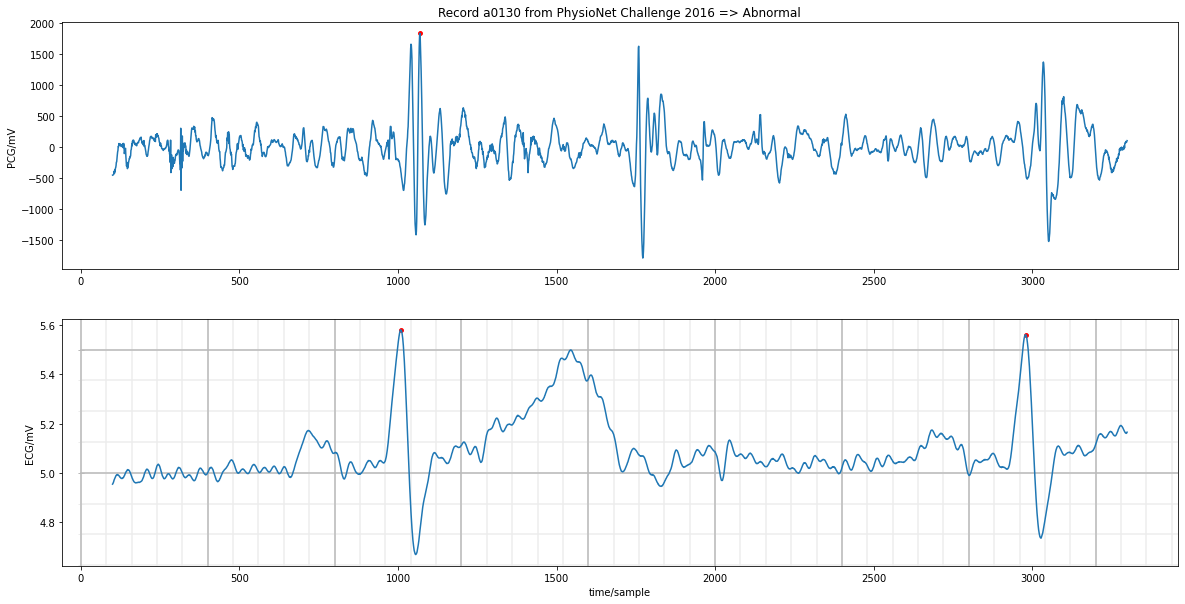

{'record_name': 'a0130',
 'n_sig': 2,
 'fs': 2000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 71193,
 'base_time': None,
 'base_date': None,
 'comments': ['Abnormal'],
 'sig_name': ['PCG', 'ECG'],
 'p_signal': array([[ 4.100e+01,  4.000e-03],
        [ 1.070e+02,  2.800e-02],
        [ 1.020e+02,  6.800e-02],
        ...,
        [-3.000e+00,  5.019e+00],
        [-1.100e+01,  5.021e+00],
        [-4.000e+00,  5.022e+00]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a0130.wav', 'a0130.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [44, None],
 'adc_gain': [1.0, 1000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [16, 16],
 'adc_zero': [0, 0],
 'init_value': [0, 4],
 'checksum': [0, -13127],
 'block_size': [0, 0]}

In [27]:
plot_pcg_ecg(129,100,3300)